In [3]:
import numpy as np

# Класс, реализующий функции однослойного перцепторна
class Perceptron:
    def __init__(self, input_size, features, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []
        # Инициализируем веса случайными небольшими значениями
        self.weights =  np.random.uniform(-1,1,(input_size,features))
        self.biases = np.random.uniform(-1,1,features)

    # Функция активации - SoftMax
    def activation(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=-1, keepdims=True)

    # Предсказание
    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.biases
        return self.activation(linear_output)

    def loss(self, predicted, target):
        return predicted - target

    #Обучение
    def fit(self, X, Y):
        for epoch in range(self.epochs):
            total_loss = 0  # Накопление ошибки за эпоху
            correct = 0

            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                output = self.predict(x)

                target = np.argmax(y)
                predicted = np.argmax(output)
               
                if predicted == target:
                    correct+=1
                    continue
                else:
                    self.weights[:,target] += self.learning_rate * X[i]
                    self.biases[target] += self.learning_rate

                    self.weights[:,predicted] -= self.learning_rate * X[i]
                    self.biases[predicted] -= self.learning_rate
                error = self.loss(output,y)
                total_loss += np.mean(error**2)
            self.loss_history.append(total_loss / len(X))
            print(f"Эпоха {epoch + 1}/{self.epochs}, Потери: {self.loss_history[-1]:.4f}")

    # Рассчёт точности обученной модели
    def evaluate(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            predict = self.predict(X[i])
            if np.argmax(predict) == np.argmax(y[i]):
                correct_predictions += 1
        return correct_predictions / len(X)

In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создаем объект перцептрона
perceptron = Perceptron(input_size=x_train.shape[1], features=y_train.shape[1], learning_rate=0.1, epochs=20)
# Обучаем перцептрон
perceptron.fit(x_train, y_train)

Эпоха 1/20, Потери: 0.0440
Эпоха 2/20, Потери: 0.0383
Эпоха 3/20, Потери: 0.0374
Эпоха 4/20, Потери: 0.0368
Эпоха 5/20, Потери: 0.0362
Эпоха 6/20, Потери: 0.0363
Эпоха 7/20, Потери: 0.0361
Эпоха 8/20, Потери: 0.0357
Эпоха 9/20, Потери: 0.0357
Эпоха 10/20, Потери: 0.0354
Эпоха 11/20, Потери: 0.0351
Эпоха 12/20, Потери: 0.0350
Эпоха 13/20, Потери: 0.0350
Эпоха 14/20, Потери: 0.0348
Эпоха 15/20, Потери: 0.0349
Эпоха 16/20, Потери: 0.0346
Эпоха 17/20, Потери: 0.0350
Эпоха 18/20, Потери: 0.0348
Эпоха 19/20, Потери: 0.0345
Эпоха 20/20, Потери: 0.0345


In [11]:
# Проверяем, как перцептрон предсказывает обучение
accuracy = perceptron.evaluate(x_test, y_test)

print(f"Точность на обучающей выборке: {accuracy * 100:.2f}%")

Точность на обучающей выборке: 74.63%


Результат работы предсказателя - [[1.78892744e-17 8.28759428e-24 2.57549110e-02 1.01688957e-03
  8.04915222e-16 1.35632255e-03 9.71871875e-01 1.79541778e-09
  8.28862753e-23 1.51204874e-25]]


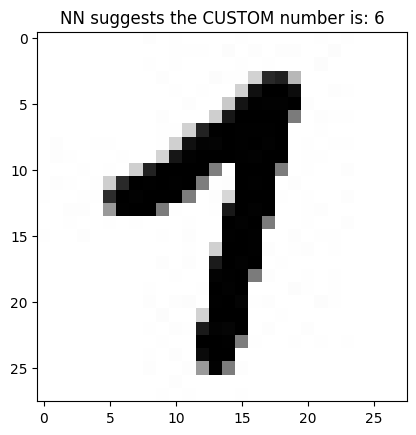

In [41]:
import matplotlib.pyplot as plt

# Берём своё изображение
test_image = plt.imread("custom_1.jpg", format="jpeg")

# Приведение изображения виду датасета MNIST
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
test_image = 1 - (gray(test_image).astype("float32") / 255)

# Преобразование изображения к виду массива
test_image = np.reshape(test_image, (test_image.shape[0] * test_image.shape[1]))

# Предсказание заданного изображения обученной моделью
image = np.reshape(test_image, (-1, 1))

output= perceptron.predict(image.T)
print(f"Результат работы предсказателя - {output}")

#print(output)
plt.imshow(test_image.reshape(28, 28), cmap="Greys")
plt.title(f"NN suggests the CUSTOM number is: {output.argmax()}")
plt.show()